<a href="https://colab.research.google.com/github/pea2/hello-world/blob/master/hw1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCE 623 Homework Assignment 1


### Student Name:  <font color="blue">SOLUTION</font>

### Date: <font color="blue">April 8, 2021</font>

## Disclosures

*   None

## Overview

In this homework assignment, you will conduct simple linear regression using the concepts you've learned in class and from the course ISLR and HOML texts. Using a dataset of automobile data, you will first attempt to find the y-intercept of the relationship between horsepower and miles per gallong manually using a numerical process. You will then calculate the exact solution using a closed-form analytical method and compare your results. Finally, you will use the Python sklearn package to fit a linear model to the data.

This assignment includes both written and programming components.

### Written Components
Full effort answers to written components should include not only the answer to the question, but they should also include supporting information. You should provide justification or supporting information even if the question only asks for a single number or short answer.

### Programming Components
Use Python to perform any manipulations you make to provided datasets, all calculations and mathematical transformations, and to generate graphs, figures, or other support to explain how you arrived at your written answers.

### Helpful Tips

You might find these Python packages/imports helpful

``` python
import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

import seaborn as sns
```

## Simple Linear Regression

### STEP 0

Install any packages you need for your notebook. If using the Google Colab environment, you will not need to install any additional packages.

In [ ]:
"""
CSCE 623 HW1. Simple Linear Regression
"""

# install packages, set configuration, as needed

'\nCSCE 623 HW1. Simple Linear Regression\n'

Import any packages you need for your notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

import seaborn as sns

#SOLUTION ADDS ADDITIONAL PACKAGES...
import warnings

### Data Analysis

In steps 1-2, you'll import and conduct an analysis of the `auto.csv` dataset.

#### STEP 1

For this assignment, you will use the auto.csv dataset located at https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv.

This dataset includes missing values, denoted as "?". You must handle these missing values. A suggested option for this dataset is to remove observations with missing data.

Store the dataset in a `pandas` `dataframe` called `df`.

In [ ]:
#STEP 1

#STUDENT CODE - insert code to load auto.csv using pandas and preprocess it (handle missing values)
# store your data in a dataframe called 'data'
#---------------------------------------------    
df = pd.read_csv('https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv', na_values='?') #classify ? as a character that means NaN
df.dropna(inplace=True)
display(df.iloc[30:35,:]) #confirm visually that first NaN is dropped
#---------------------------------------------    


#show the dataset was loaded by displaying first few rows
df.head()

STEP_1_COMPLETE = True

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
30,28.0,4,140.0,90.0,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228,14.0,71,3,toyota corona
33,19.0,6,232.0,100.0,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105.0,3439,15.5,71,1,plymouth satellite custom
35,17.0,6,250.0,100.0,3329,15.5,71,1,chevrolet chevelle malibu


#### STEP 2
A common first step after importing a dataset is to explore it. Useful `pandas` `dataframe` methods include `info`, `hist`, and `corr` as well as `scatter_matrix` in `pandas.plotting`. You may also find the `pairplot` function in the `seaborn` package to be useful.

Use Python to do the following and then answer the questions below:

1. Display statistics of the dataset.
2. Display a histogram of each of the individual feature values.
3. Choose a subset of at least 5 attributes you expect to be related to one another and display a scatterplot of each of the pairings between each possible pair of these attributes.

##### Programming

Data Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


None

Data Statistics:

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Data Correlations:

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


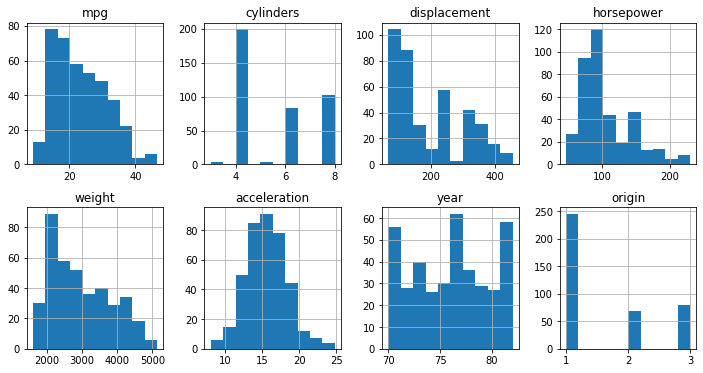

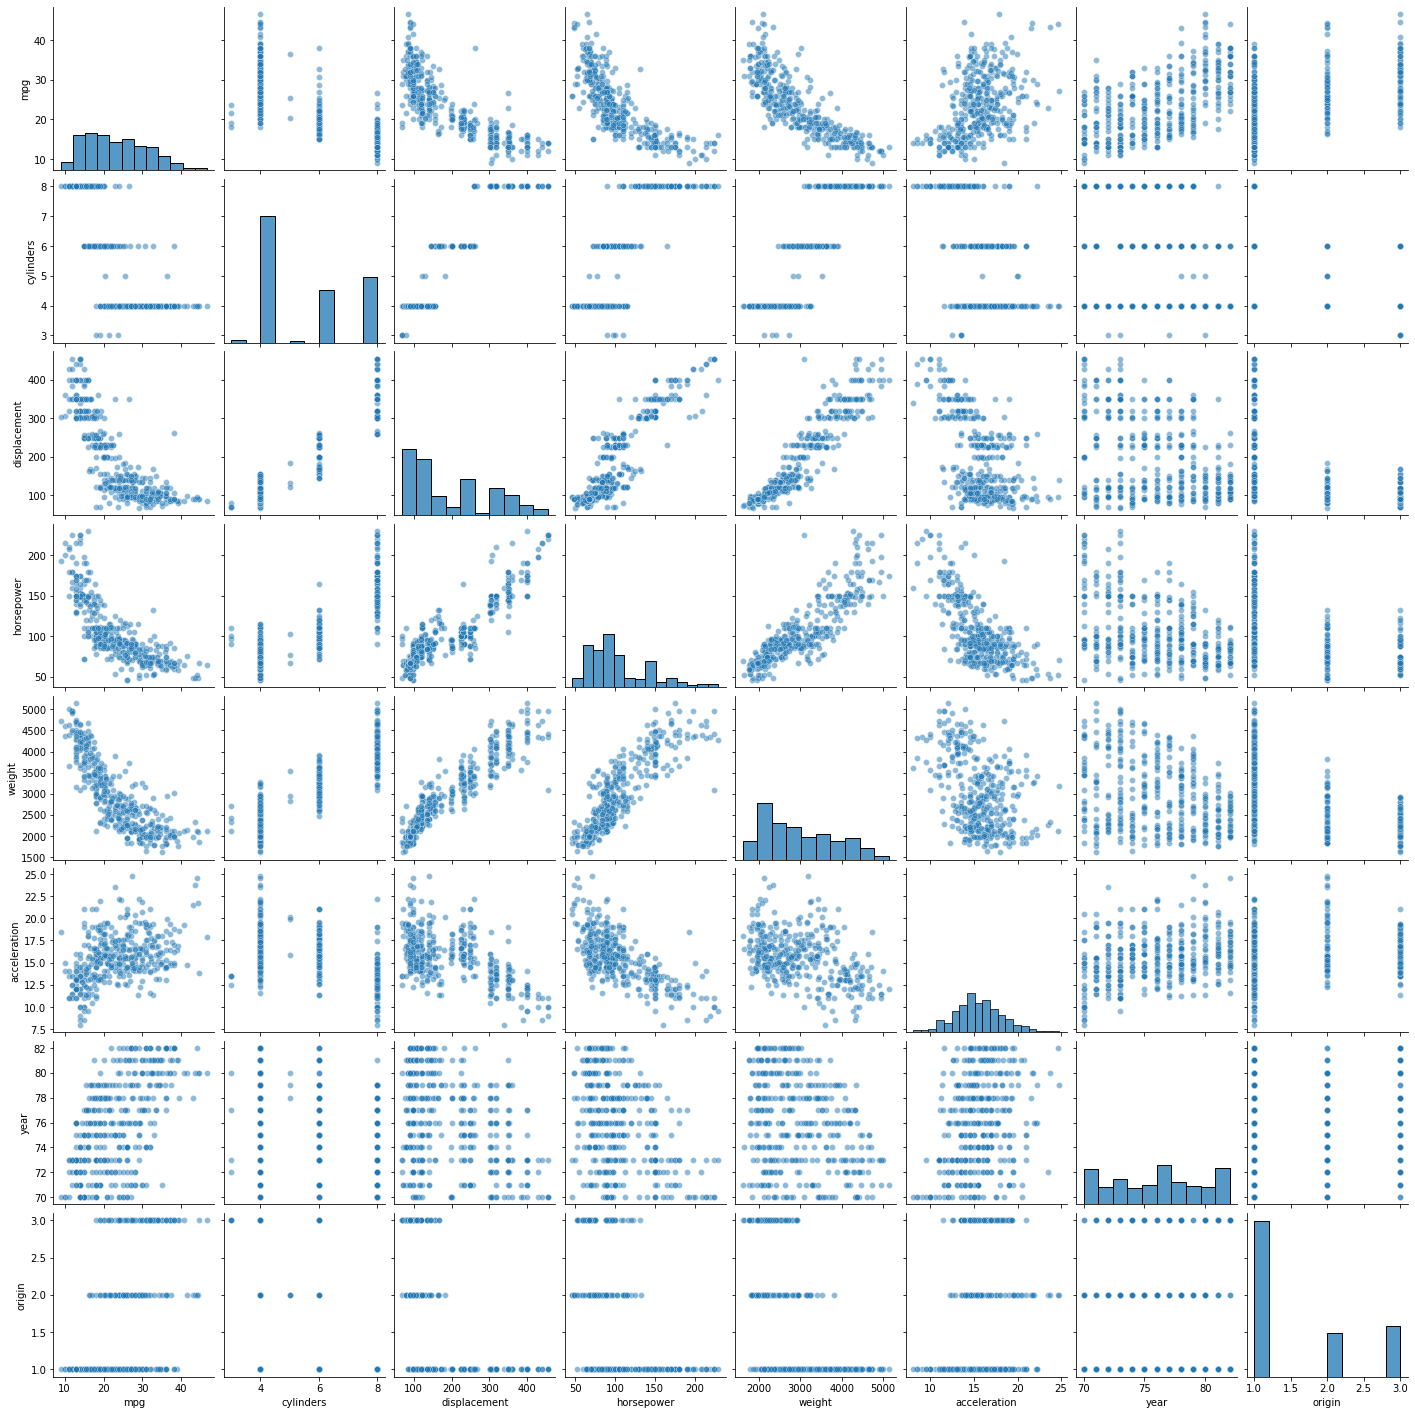

In [ ]:
#STEP 2

#STUDENT CODE - Insert code to explore the dataset here
#---------------------------------------------
display(md(r"Data Info:"))
display(df.info())
display(md(r"Data Statistics:"))
display(df.describe()) # high level statistics to get an idea for the amount, levels, and distribution
display(md('Data Correlations:'))
display(df.corr()) # numerical correlation
df.hist(layout=(2,4), figsize=(12,6));
#scatter_matrix(df, figsize=(24,24))
sns.pairplot(df, plot_kws={'alpha': 0.5}) # I find the seaborn one to look a lot more polished than the pandas version out of the box
plt.show();
#--------------------------------------------- 

##### <font color='blue'>Written Responses</font>

1. How many observations/datapoints are there?
   
   <font color='green'>The table above shows that there are 392 observations after NaN values are removed.</font>

2. How many features/attributes are there per observation? Describe these features in terms of type of data (feature/response and numerical/categorical)
   
   <font color='green'>Each observation has nine features. With the exception of origin, the meaning of feature is clear from the feature's title. Input features include `cylinders` (numerical),	`displacement` (numerical), `horsepower` (numerical), `weight` (numerical), `acceleration` (numerical), `year` (numerical), `origin` (categorical), and `name` (categorical). The numerical response attribute is `mpg`.</font>

3. Describe the distribution of each feature in terms of statistical descriptions (e.g., uniform, normal/Gaussian, exponential, skewed, multi-modal).

   <font color='green'>A study of the histograms above indicate that only the `acceleration` feature has a normal distribution. The `displacement`, `horsepower`, `mpg`, and `weight` features are all skewed to lower numbers indicating that the dataset may consist primarily of cars with smaller engines.  The `year` feature is relatively uniform with some multi-modal behavior at the extremes and in the middle of the range. Nearly all of the vehicles have an even number of `cylindars`, though the dataset is skewed toward vehicles with 4 `cylindars`. The meaning of the `origin` feature is unclear, but most of the vehicles have a value of 1. </font>

4. Describe the attributes you chose for relational analysis in terms of weak- and strong-relationships, linear and non-linear relationships, and positive and negative correlations.

   <font color='green'>For relational analysis, we compared every pair of numerical features. The `cylindars` attribute appears to have a negative linear correlation with `mpg` and `acceleration`, and it has a positive linear relationship with `displacement`, `horsepower`, and `weight`. Likewise, `mpg` has a weak but somewhat positive linear relationship with `year`. On the other hand, `mpg` has a negative exponential relationship with `displacement`, `horsepower`, and `weight`, but `mpg` may have a weak positive relationship with `acceleration` that is either linear or exponential. The `displacement` attribute has a strong, positive, linear relationship with `horsepower` and `weight`, but it has a weak, negative relationship with `acceleration`. `horsepower` has a strong, positive, linear relationship with `weight`, and negative relationship with `acceleration`. All other relationships appear to have at best a weak correlation, if any at all.</font>

In [ ]:
STEP_2_COMPLETE = True

### Find optimal $\beta_1$ value

In steps 3-7, you'll find an optimal $\beta_1$ value assuming $\beta_0$ = 40.

#### STEP 3
Make a single scatterplot of horsepower (x axis) by MPG (y axis).

Set the axes so that the origin (0,0) is included, as well as all of the datapoints. Label axes appropriately, "Horsepower" and "MPG"). 

Assuming the relationship between Horsepower and MPG is linear and $\beta_0$ (y-intercept) is fixed at 40, estimate a value of `beta1guess` (slope) from a visual inspection of the scatterplot.

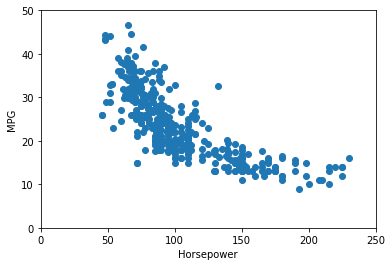

In [ ]:
#STEP 3

beta0init = 40.

#STUDENT CODE - Make a single scatterplot of horsepower (x axis) by MPG (y axis) 
# Insert the value of beta1guess based on eyeballing the graph
#---------------------------------------------  
plt.scatter(df.horsepower, df.mpg)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.xlim([0,250])
plt.ylim([0,50])
plt.show();

beta1guess = -30./225. # rise over run approximation
#--------------------------------------------- 

md(r"Guess for $\beta_1$ = %f" %beta1guess)

STEP_3_COMPLETE = True

#### STEP 4
Make a `numpy` array of possible $\beta_1$ values named `beta1bracket` that surround your `beta1guess` value. Do not hard code your values. Instead, use code. You may find the `numpy` `arange` or `linspace` functions useful.

In [ ]:
#STEP 4

#STUDENT CODE - Insert code to make a set of possible beta1 values to test & display the values you chose
#---------------------------------------------          
beta1bracket = np.arange(0., -0.5, -0.001) # used arange as opposed to linspace for ease of step size
#--------------------------------------------- 
print(beta1bracket)
STEP_4_COMPLETE = True

[ 0.    -0.001 -0.002 -0.003 -0.004 -0.005 -0.006 -0.007 -0.008 -0.009
 -0.01  -0.011 -0.012 -0.013 -0.014 -0.015 -0.016 -0.017 -0.018 -0.019
 -0.02  -0.021 -0.022 -0.023 -0.024 -0.025 -0.026 -0.027 -0.028 -0.029
 -0.03  -0.031 -0.032 -0.033 -0.034 -0.035 -0.036 -0.037 -0.038 -0.039
 -0.04  -0.041 -0.042 -0.043 -0.044 -0.045 -0.046 -0.047 -0.048 -0.049
 -0.05  -0.051 -0.052 -0.053 -0.054 -0.055 -0.056 -0.057 -0.058 -0.059
 -0.06  -0.061 -0.062 -0.063 -0.064 -0.065 -0.066 -0.067 -0.068 -0.069
 -0.07  -0.071 -0.072 -0.073 -0.074 -0.075 -0.076 -0.077 -0.078 -0.079
 -0.08  -0.081 -0.082 -0.083 -0.084 -0.085 -0.086 -0.087 -0.088 -0.089
 -0.09  -0.091 -0.092 -0.093 -0.094 -0.095 -0.096 -0.097 -0.098 -0.099
 -0.1   -0.101 -0.102 -0.103 -0.104 -0.105 -0.106 -0.107 -0.108 -0.109
 -0.11  -0.111 -0.112 -0.113 -0.114 -0.115 -0.116 -0.117 -0.118 -0.119
 -0.12  -0.121 -0.122 -0.123 -0.124 -0.125 -0.126 -0.127 -0.128 -0.129
 -0.13  -0.131 -0.132 -0.133 -0.134 -0.135 -0.136 -0.137 -0.138 -0.139
 -0.14

#### STEP 5

Create a function `rss1d(beta0, beta1, x, y)` to compute the sum of squared residuals (RSS) for a given $\beta_0$ and $\beta_1$ and a vector of input features `x` and target values `y`. You may assume that `x` and `y` are each single vector arrays (in this case, `pandas` Series).

Then, use this function to compute the RSS for the fixed `beta0init` value (40) and for each member of the `beta1bracket` vector you created in STEP 4. Store these RSS values in a `numpy` array named `rssbeta1`.


In [ ]:
#STEP 5

#STUDENT CODE - Insert code to compute the sum of squared residual errors (RSS) under each possible beta1bracket member.
#---------------------------------------------
def rss1d(beta0, beta1, x, y):

    # remove unnecessary axes from x and y 
    x = np.squeeze(x)
    y = np.squeeze(y)

    # display a warning and return if x is not one dimensional
    if len(x.shape) != 1 and len(y.shape) != 1:
        warnings.warn('rss1d is built for 1-dimensional x and y')
        return

    beta = np.array([beta0, beta1], dtype="object")

    # Create a 2d design matrix from x
    X = np.array([np.ones(x.shape[0]),x]).T

    # np.dot returns 2d array, so we squeeze to remove extra dimension
    yhat = np.squeeze(np.dot(X,beta)) 

    # calculate residuals
    ydiff = y-yhat

    # return residual sum of squares
    return np.dot(ydiff,ydiff)

def loop_method():
    rssbeta1 = np.array([]) # could preallocate to size of beta1bracket, but then have to use multiple for args and enumerate
    for beta1 in beta1bracket:
        rssbeta1 = np.append(rssbeta1, rss1d(beta0init, beta1, df.horsepower, df.mpg))

    return rssbeta1

def vector_method(): # this vector method runs 60-80 times faster than the loop method
    return np.array(rss1d(beta0init, beta1bracket, df.horsepower, df.mpg))

rssbeta1 = vector_method()
#--------------------------------------------- 

STEP_5_COMPLETE = True

#### STEP 6

Make a new plot of $\beta_1$ values on the x axis and the RSS values you calculated in STEP 5 on the y axis (computed in step 5). Label your axes and use math fonts in your labels.

Use the `numpy` function `argmin` to find the $\beta_1$ value having the smallest RSS. Store this value in a variable named `beta1min`.

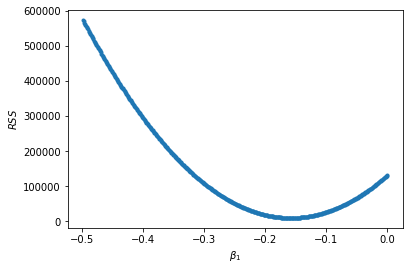

$\beta_1$ for minimum $RSS = -0.158000$

In [ ]:
#STEP 6

#STUDENT CODE - make a new plot of beta_1 values on the x axis and RSS cost on the y axis (computed in step 5). 
#label your axes and use math fonts in your labels if possible
#find the beta1 value having the smallest RSS, and assign this value to beta1min
#---------------------------------------------          
plt.scatter(beta1bracket,rssbeta1, marker='.')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$RSS$')
plt.show();

beta1min = beta1bracket[np.argmin(rssbeta1)]
display(md(r'$\beta_1$ for minimum $RSS = %f$' %beta1min))
#--------------------------------------------- 

STEP_6_COMPLETE = True

#### STEP 7

<font color='blue'>Describe the RSS plot you created in STEP 6 by answering the following questions.</font>

1. What is the shape of the plot in STEP 6?  
  
  <font color='green'>The shape of the $\beta_1$ vs. RSS plot is a parabola.</font>

2. Using the plot, how might someone find the best value of $\beta_1$:  
  
  <font color='green'>The best value of $\beta_1$ is the value with the smallest error, or the $\beta_1$ value at the bottom of the parabola.</font>

3. Select & report value of $\beta_1$ you think will have the best fit. Note that you may need to improve your estimate in STEP 3 or add additional $\beta_1$ values in `beta1bracket` in STEP 4, then repeat steps 5 and 6. Assuming the range of values in `beta1bracket` have sufficient granularity and contain an optimal $\beta_1$ value, you may find the use of the `numpy` function `argmin` will be helpful to find the $\beta_1$ value having the smallest RSS value.

  <font color='green'>The $\beta_1$ value providing the best fit (assuming steps of $0.001$ searching in the range of $-0.5$ and $0.0$) is $\beta_1 = -0.158$.</font>





In [ ]:
STEP_7_COMPLETE = True

### Evaluate $\beta_1$ value

In steps 8-12, you'll evaluate the $\beta_1$ value you discovered in steps 3-7 and compare it to the closed form solution.*italicized text*

#### STEP 8
Build a new scatterplot with horsepower(x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Add a line to the plot - the linear regression line in <font color="red">red</font> implied by the fixed $\beta_0 = 40$ (`beta0init`) and your best choice for $\beta_1$ (`beta1min`). Label your linear regression line, "1st order fitted line".

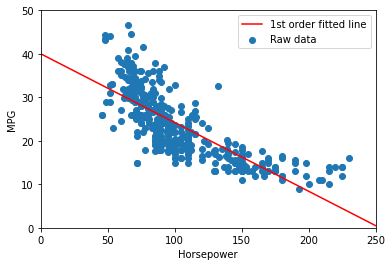

In [ ]:
#STEP 8

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the fixed beta0init=40 and your best choice for beta1 
#---------------------------------------------
plt.scatter(df.horsepower, df.mpg, label='Raw data')
plot_x = np.arange(0,251,1)
yhat = beta0init+beta1min*plot_x # easier to calculate without putting in vector form for 1-variable regression
plt.plot(plot_x, yhat, '-r', label='1st order fitted line')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show();

#--------------------------------------------- 

STEP_8_COMPLETE = True

#### STEP 9
Implement equation 3.4 on page 62 to develop the closed-form function `computeBetas(xVec, yVec)` 
which accepts a column vector of x values and a column vector of y values and returns betas, 
which is a structure containing the values for the 2 coefficients $\beta_0$ and $\beta_1$  

In [ ]:
#STEP 9

#STUDENT CODE - In code, implement equation 3.4 on page 62 to develop the closed-form function computeBetas(xVec, yVec) 
# which accepts a column vector of x values and a column vector of y values and returns betas, 
# which is a structure containing the values for the 2 coefficients beta0 and beta1  
#--------------------------------------------- 
def computeBetasMatrixForm(xVec, yVec):
    if len(xVec.shape)==1: # need to expand dims if shape of form (n,)
        xVec = np.expand_dims(xVec,1)
        
    if  not np.allclose(np.ones((xVec.shape[0],1)),xVec[:,0]): # check if there is already a column of ones in front
        xVec = np.hstack([np.ones((xVec.shape[0],1)),xVec])
        
    XpX = np.dot(xVec.T,xVec) # X'X
    XpY = np.dot(xVec.T,yVec) # X'Y
    
    return np.dot(np.linalg.inv(XpX),XpY) # b=(X'X)^-1(X'Y)

def computeBetasNonMatrixForm(xVec, yVec):

    beta1 = np.sum(np.dot((xVec - np.mean(xVec)).T,(yVec - np.mean(yVec)))) / np.sum((xVec - np.mean(xVec)) ** 2)    
    beta0 = np.mean(yVec) - beta1 * np.mean(xVec)
    return [beta0, beta1]

def computeBetas(xVec, yVec):
    return computeBetasMatrixForm(xVec, yVec)
#--------------------------------------------- 

STEP_9_COMPLETE = True

In the `computeBetasMatrixForm` function above I used the matrix form of Equation 3.4 on page 62 of ISLR. The equation is $\mathbf{b} = \left(\mathbf{X}'\mathbf{X}\right)^{-1}\mathbf{X}'\mathbf{Y}$ and comes from Equation 5.60 on page 200 of _Applied Linear Statistical Models, 5th ed._ by Kutner, Nachtsheim, Neter, and Li. It is the book used in Math 696, Applied General Linear Models. The matrix form calculates the betas approximately 9% faster than the non-matrix form.

#### STEP 10
Compute and display the best $\beta_0$ and $\beta_1$ for the auto dataset by calling the closed-form function in step 9

In [ ]:
#STEP 10
#STUDENT CODE - Compute and display beta0 and beta1 for the auto dataset by calling the closed-form function in step 9
#---------------------------------------------
betas = computeBetas(df.horsepower, df.mpg)
display(md(r'Best $\beta_0=$ %f' %betas[0]))
display(md(r'Best $\beta_1=$ %f' %betas[1]))

#--------------------------------------------- 

STEP_10_COMPLETE = True

Best $\beta_0=$ 39.935861

Best $\beta_1=$ -0.157845

#### STEP 11

How does the closed form computed value of $\beta_1$ compare with your estimate of $\beta_1$ from step 6? 

<font color='green'>
The  calculated best $\beta_0$ varies by $\approx 0.064$ from the one used in the iterative $\beta_1$ search, so we would not expect to have exactly the same results for the analytical solution, yet the analytical $\beta_1=-0.157845$ differs from the iterative $\beta_1=0.1580$ by only $0.000155$. It is possible that with a smaller step size than $0.001$, we could have obtained a $\beta_1$ value closer to the analytical solution. However, due to the difference in $\beta_0$, it is unlikely that we would ever reach the exact same optimal $\beta_1$ value. Nonetheless, given the range of the horsepower data is about $200$, the difference in $\beta_1$ accounts for about $0.03$ miles per gallon over that interval. Since miles per gallon is only reported to the tenths, we are well within the data's measurement error.</font>

In [ ]:
STEP_11_COMPLETE = True

#### STEP 12
Build a new scatterplot with horsepower(x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Add a <font color="green">green</font> linear regression line formed by the closed form beta values you determined in STEP 10. Label your linear regression line, "1st order closed-form fit".

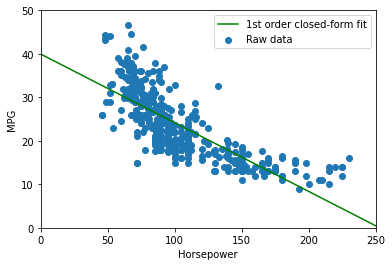

In [ ]:
#STEP 12

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the beta0 and beta1 you determined in step 10 
#---------------------------------------------          
# X_plot = np.vstack((np.ones(250),np.linspace(1,250,num=250))).T
# yhat = np.dot(X_plot, betas)

plt.scatter(df.horsepower, df.mpg, label='Raw data')
plot_x = np.arange(0,251,1)
yhat = betas[0]+betas[1]*plot_x # easier to calculate without putting in vector form for 1-variable regression
plt.plot(plot_x, yhat, '-g', label='1st order closed-form fit')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show();
#--------------------------------------------- 

STEP_12_COMPLETE = True

### Fit model using `sklearn`

#### STEP 13
Use `sklearn`'s `linear_model` function to fit a linear model from horsepower to mpg. Store your model in a variable named `mpg_hp_model`. Calculate the coefficients, explained variance score, and MSE, storing the values in variables names `beta0`, `beta1`, `r2`, and `mse`. Display each of these values.

In [ ]:
#STEP13

#STUDENT CODE - Use sklearn's linear model function to fit a linar model from horsepower to mpg. 
# also, display the coefficients, MSE and explained variance score
#---------------------------------------------          
mpg_hp_model = linear_model.LinearRegression()

# we must change the series (1d array) to a vertical 2d array
# each of the following are equivalent

# X = df.horsepower.values.reshape(-1,1)
# X = np.expand_dims(df.horsepower, axis=1)
X = np.array(df.horsepower)[:, np.newaxis]

# fit the model to the inputs and outputs
mpg_hp_model.fit(X, df.mpg)

beta0 = mpg_hp_model.intercept_
beta1 = mpg_hp_model.coef_
r2 = mpg_hp_model.score(X, df.mpg)

yhat = mpg_hp_model.predict(X)
mse = mean_squared_error(df.mpg, yhat)

display(md(r'$\beta_0 =$ %f' %beta0))
display(md(r'$\beta_1 =$ %f' %beta1))
display(md(r'$R^2 =$ %f' %r2))
display(md(r'$MSE =$ %f' %mse))
#--------------------------------------------- 

STEP_13_COMPLETE = True

$\beta_0 =$ 39.935861

$\beta_1 =$ -0.157845

$R^2 =$ 0.605948

$MSE =$ 23.943663

#### STEP 14
Build a new scatterplot with horsepower (x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Add a <font color="black"><strong>black</strong></font> linear regression line implied by the sklearn model created in STEP 13.

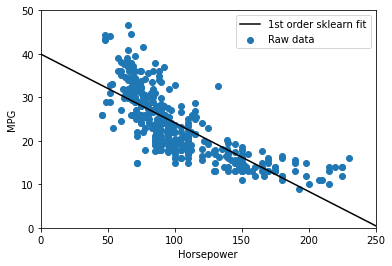

In [ ]:
#STEP 14

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the sklearn model determined in step 13 
#---------------------------------------------   
plt.scatter(df.horsepower, df.mpg, label='Raw data')
yhat = mpg_hp_model.predict(plot_x[:, np.newaxis])
plt.plot(plot_x, yhat, '-k', label='1st order sklearn fit')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show();
#--------------------------------------------- 

STEP_14_COMPLETE = True

## STEP 15a:
Compute the residual errors in predicting mpg from horsepower.  Plot these residual errors as a function of horsepower using a scatterplot.  Add a <font color="red">red</font> horizontal line at y=0 to indicate the zero-error position.

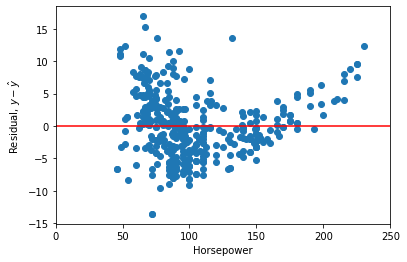

In [ ]:
#STUDENT CODE

#---------------------------------------------  
yhat = mpg_hp_model.predict(np.array(df.horsepower)[:, np.newaxis])
residuals = df.mpg - yhat

plt.scatter(df.horsepower, residuals)
plt.hlines(0,0,250, color='r')
plt.xlim([0,250])
plt.xlabel('Horsepower')
plt.ylabel(r'Residual, $y-\hat{y}$')
plt.show();

#---------------------------------------------      

## STEP 15b

Describe the plot - particularly the trends. Do the errors appear well-distributed, or are there trends? If there are trends, explain what these trends indicate about the ability to predict mpg from horsepower using a linear model, and give at least one course of action you could take to make a better model.

<font color="green">The plot shows the residuals of the fit of mpg estimated from the horsepower feature. The data is heavily represented in lower horsepowers, as discussed above, but it is apparent there is a distinct curvature to the residuals, indicating there may be non-linearity in the relationship between mpg and horsepower. Due to this curvature, it is somewhat difficult to analyze the homoscedasticity of the data, though it appears there may be less variance as the horsepower increases. This finding is obfuscated by the left-skewedness of the distribution. To address these concerns, I would first include a second order term relating mpg and horsepower into the model. Then, I would reexamine the residuals. If heteroscedasticity remains, the data may need to be transformed prior to the model fitting process in order to not invalidate further inference.</font>



In [ ]:
STEP_15_COMPLETE = True

#### Optional
Optional (not required, but good practice in developing your coding skills):  build a structure containing possible values for $\beta_0$ and $\beta_1$ pairs.   Compute the RSS over all beta pairs at each cell in the matrix on the horsepower vs. MPG data.  Now build a contour and/or 3D plot of these RSS values as shown in the book Figure 3.2 on page 63 (the x and y axes are $\beta_0$ and $\beta_1$ and the z axis is RSS).   Write code to determine the beta pair with the minimum RSS.  Report the minimum value cost. On your contour/3D plot, add a point at the location of the $\beta_0$, $\beta_1$ coordinates which minimize the RSS.

In [ ]:
#STUDENT CODE

#---------------------------------------------

#---------------------------------------------